# Predicting type of breast cancer cells

Questions of interest:
    1. What features of a cell are the largest drivers of malignancy?
    2. How would a physician use your product?
    3. There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?

Project description.

The dataset contains the following features for each cell:
Sample code number: id number
Clump Thickness: 1 - 10
Uniformity of Cell Size: 1 - 10
Uniformity of Cell Shape: 1 - 10
Marginal Adhesion: 1 - 10
Single Epithelial Cell Size: 1 - 10
Bare Nuclei: 1 - 10
Bland Chromatin: 1 - 10
Normal Nucleoli: 1 - 10
Mitoses: 1 - 10
Class: (2 for benign, 4 for malignant)

My investigation
Hypotheses
Findings
Recommendations

In [240]:
import numpy as np
import pandas as pd

In [241]:
df = pd.read_csv('breast-cancer-wisconsin.txt')
df.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


In [242]:
df.columns

Index(['Index', 'ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

## 2. Exploratory Data Analysis

First I'm checking the dataset for any missing values, duplicates...
There are 28 data rows with missing information. Compared to the dataset size, that is a fairly small number, so, I'm goint to drop those values.

In [243]:
df.describe

<bound method NDFrame.describe of        Index        ID  Clump Thickness Uniformity of Cell Size  \
0          0   1241035                7                       8   
1          1   1107684                6                      10   
2          2    691628                8                       6   
3          3   1226612                7                       5   
4          4   1142706                5                      10   
5          5    601265               10                       4   
6          6    378275               10                       9   
7          7   1142706                5                      10   
8          8    601265               10                       4   
9          9   1226612                7                       5   
10        10   1169049                7                       3   
11        11    691628                8                       6   
12        12   1111249               10                       6   
13        13   1076352      

In [244]:
#any null values in the dataset?
df_missing = df[df['Bare Nuclei'].isnull()]
len(df_missing)

28

In [245]:
df = df.dropna()
len(df)

15827

In [246]:
len(df['ID'].unique())

666

In [247]:
#there is a double index, solving that here
df = df.drop(columns = ['Index'])

In [248]:
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


In [249]:
#dropping duplicates
df = df.drop_duplicates()
len(df)

741

In [250]:
len(df[df['ID'].duplicated()])

75

In [251]:
#remove all non-numeric rows (filtered based on a category that has to be numeric)
df.loc[:,'non_numeric'] = pd.to_numeric(df['Uniformity of Cell Size'], errors='coerce').isnull()

In [252]:
df = df[df.non_numeric == False]

In [253]:
#45 are multiple visits by a single patient, not touching that
len(df[df['ID'].duplicated()])

45

In [254]:
type(df.Mitoses[0])

str

In [255]:
df = df.drop(['non_numeric'], axis=1)

In [256]:
len(df[df['Bare Nuclei'] =='?'])

16

In [263]:
df["Bare Nuclei"] = df["Bare Nuclei"].replace('?', 11)
df["Bare Nuclei"] = df["Bare Nuclei"].apply(pd.to_numeric)
type(df["Bare Nuclei"][0])

numpy.int64

In [267]:
df = df.apply(pd.to_numeric)

In [285]:
df[(df.Class == 20) | (df.Class == 40)] = df[(df.Class == 20) | (df.Class == 40)]/10

<Figure size 432x288 with 0 Axes>

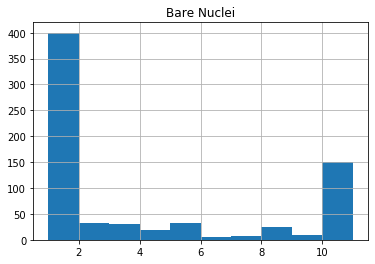

In [290]:
import matplotlib.pyplot as plt
figure = plt.figure()
df.hist(column = 'Bare Nuclei')
plt.show()

# 2. Visualization

Two classes, fairly unbalanced as expected (malignant casses are less common)

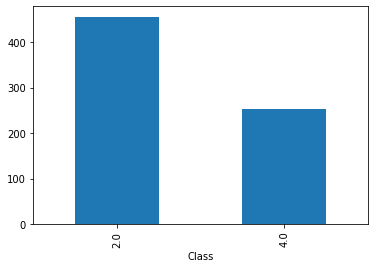

In [292]:
import matplotlib.pyplot as plt
figure = plt.figure()
df.groupby('Class').Class.count().plot.bar(ylim=0)
plt.show()

<Figure size 2160x720 with 0 Axes>

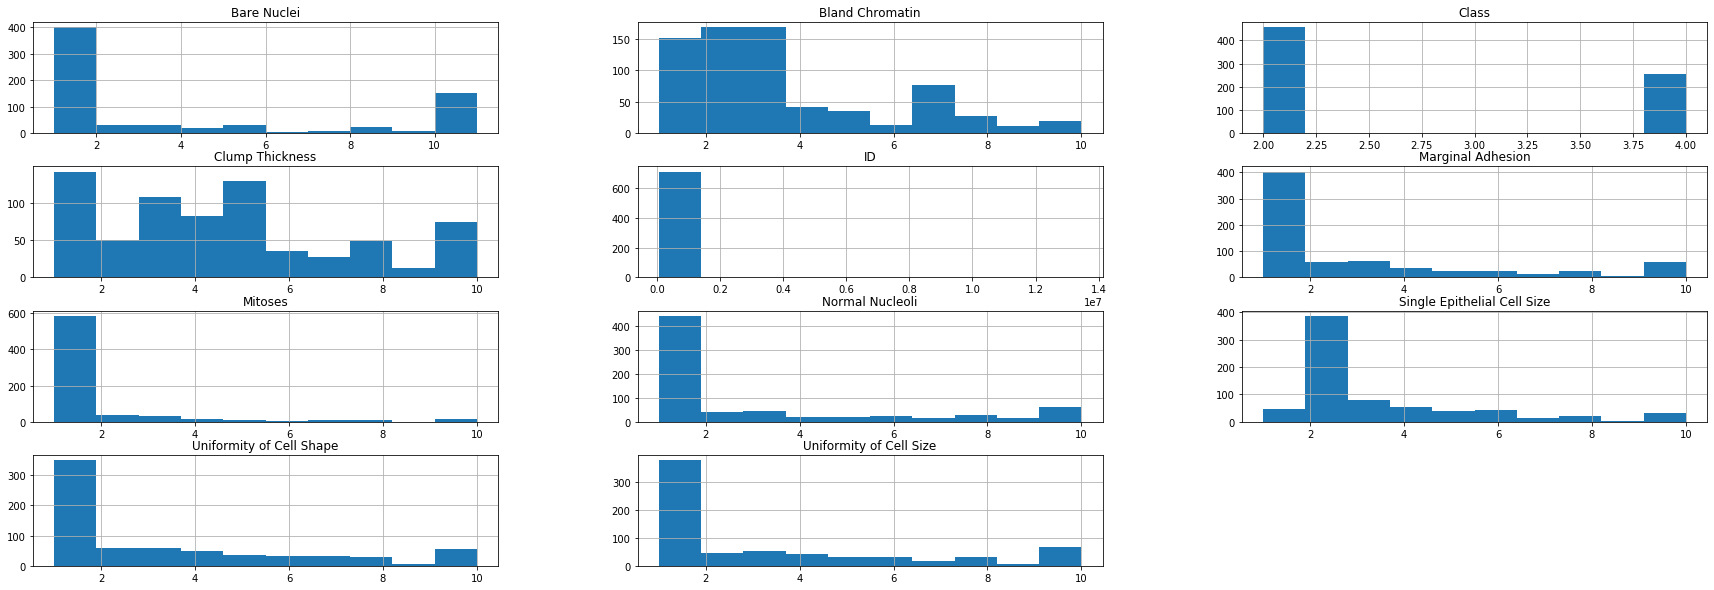

In [301]:
#indiviual features histograms (Clump Thickness, Bland Chromatin most variable)
figure = plt.figure()
df.hist()
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

## 3. Feature extraction

In [303]:
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1241035.0,7.0,8.0,3.0,7.0,4.0,5.0,7.0,8.0,2.0,4.0
1,1107684.0,6.0,10.0,5.0,5.0,4.0,10.0,6.0,10.0,1.0,4.0
2,691628.0,8.0,6.0,4.0,10.0,10.0,1.0,3.0,5.0,1.0,4.0
3,1226612.0,7.0,5.0,6.0,3.0,3.0,8.0,7.0,4.0,1.0,4.0
4,1142706.0,5.0,10.0,10.0,10.0,6.0,10.0,6.0,5.0,2.0,4.0


In [322]:
X_df = df.drop(columns = ['ID','Class'])
y_df = df['Class']
y_new = [0 if item == 2 else 1 for item in y_df]

In [310]:
X = X_df.values
y = y_df.values

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(475, 9) (475,)
(235, 9) (235,)


In [326]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [333]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
#predictions = predictions.todense()
# score evaluation results
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score)
confusion_matrix(y_test, predictions)
#classification_report = metrics.classification_report(y_test, predictions, target_names=id_to_category)

0.948936170212766


array([[146,   4],
       [  8,  77]])